In [1]:
import sys
sys.path.append("../..")

from digitalhistopathology.engineered_features.engineered_features import scMTOP_EngineeredFeatures

2025-11-24 16:32:24.580746: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/cv2/../../lib64:/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/cv2/../../lib64:
2025-11-24 16:32:24.580872: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/cv2/../../lib64:/storage/homefs/lf25x455/.conda/envs/digitalhisto/lib/python3.10/site-packages/cv2/../../lib64:
2025-11-24 16:32:24.580880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [2]:
eng = scMTOP_EngineeredFeatures(result_saving_folder="../../results/Ovarian/engineered_features/scMTOP",
                                dataset_name='Ovarian', 
                                patches_info_filename="../../results/Ovarian/compute_patches/all/patches_info.pkl.gz", 
                                path_to_cellvit_folder="../../results/Ovarian/segmentation")

['NAB-HUG-14_HE_Visium3_Scan1', 'NAB-HUG-03_HE_Visium3_Scan1']
Loading the whole scMTOP embedding from  ../../results/Ovarian/engineered_features/scMTOP/Ovarian/Ovarian_scMTOP.csv


In [3]:
patch_to_cell_03 = eng.map_cells_and_patches(wsi_name="NAB-HUG-03_HE_Visium3_Scan1",
                                             wsi_cellvit_path="/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/Ovarian/segmentation/")

Length of the scMTOP json: 298454
Number of patches in NAB-HUG-03_HE_Visium3_Scan1: 68934
['NAB-HUG-14_HE_Visium3_Scan1', 'NAB-HUG-03_HE_Visium3_Scan1']


In [4]:
# eng.convertjson_from_cellvit_to_scMTOP("../../results/Ovarian/segmentation/NAB-HUG-14_HE_Visium3_Scan1/cell_detection/cells.json")

In [5]:
patch_to_cell_14 = eng.map_cells_and_patches(wsi_name="NAB-HUG-14_HE_Visium3_Scan1",
                                             wsi_cellvit_path="/storage/research/dbmr_luisierlab/temp/lfournier/repositories/TumorArchetype-FM/results/Ovarian/segmentation/")

Length of the scMTOP json: 64131
Number of patches in NAB-HUG-14_HE_Visium3_Scan1: 20383
['NAB-HUG-14_HE_Visium3_Scan1', 'NAB-HUG-03_HE_Visium3_Scan1']


In [6]:
import json

cells_03 = json.load(open("../../results/Ovarian/segmentation/NAB-HUG-03_HE_Visium3_Scan1/cell_detection/cells_for_scMTOP.json"))
cells_14 = json.load(open("../../results/Ovarian/segmentation/NAB-HUG-14_HE_Visium3_Scan1/cell_detection/cells_for_scMTOP.json"))

In [7]:
patch_to_cell_type_03 = {
    patch: [cells_03["nuc"][cell_id]["type"] for cell_id in cell_ids]
    for patch, cell_ids in patch_to_cell_03.items()
}

In [8]:
patch_to_cell_type_14 = {
    patch: [cells_14["nuc"][cell_id]["type"] for cell_id in cell_ids]
    for patch, cell_ids in patch_to_cell_14.items()
}

In [9]:
summary_patch_to_cell_type_03 = {
    patch: {"n_cells": len(cell_ids),
            "n_T": sum(1 for cell_type in cell_ids if cell_type == 1),
            "n_I": sum(1 for cell_type in cell_ids if cell_type == 2),
            "n_C": sum(1 for cell_type in cell_ids if cell_type == 3),
            "n_D": sum(1 for cell_type in cell_ids if cell_type == 4),
            "n_E": sum(1 for cell_type in cell_ids if cell_type == 5)
            }
            for patch, cell_ids in patch_to_cell_type_03.items()
        }

In [10]:
summary_patch_to_cell_type_14 = {
    patch: {"n_cells": len(cell_ids),
            "n_T": sum(1 for cell_type in cell_ids if cell_type == 1),
            "n_I": sum(1 for cell_type in cell_ids if cell_type == 2),
            "n_C": sum(1 for cell_type in cell_ids if cell_type == 3),
            "n_D": sum(1 for cell_type in cell_ids if cell_type == 4),
            "n_E": sum(1 for cell_type in cell_ids if cell_type == 5)
            }
            for patch, cell_ids in patch_to_cell_type_14.items()
        }

In [11]:
import pandas as pd
df_patches_03 = pd.DataFrame.from_dict(summary_patch_to_cell_type_03, orient="index")
df_patches_14 = pd.DataFrame.from_dict(summary_patch_to_cell_type_14, orient="index")

In [12]:
df_patches = pd.concat([df_patches_03, 
df_patches_14])

In [13]:
df_patches

n_cells  n_T  n_I  n_C  n_D  n_E
NAB-HUG-03_HE_Visium3_Scan1_patch000000       70   32    1   18    0   19
NAB-HUG-03_HE_Visium3_Scan1_patch000001       96   49   13   34    0    0
NAB-HUG-03_HE_Visium3_Scan1_patch000002       62    0    1   61    0    0
NAB-HUG-03_HE_Visium3_Scan1_patch000003      119   79   16   24    0    0
NAB-HUG-03_HE_Visium3_Scan1_patch000004      118   77    9   17    0   15
...                                          ...  ...  ...  ...  ...  ...
A1_NAB_HUG_14_spot51x25                       71   22    4   43    0    2
A1_NAB_HUG_14_spot51x26                       97   52   16   29    0    0
A1_NAB_HUG_14_spot51x27                      104   55   24   25    0    0
A1_NAB_HUG_14_spot51x28                       74   26    5   43    0    0
A1_NAB_HUG_14_spot51x29                       72   19    4   49    0    0

[89317 rows x 6 columns]

In [14]:
df_patches["prop_T"] = df_patches["n_T"] / df_patches["n_cells"]
df_patches["prop_I"] = df_patches["n_I"] / df_patches["n_cells"]
df_patches["prop_C"] = df_patches["n_C"] / df_patches["n_cells"]
df_patches["prop_D"] = df_patches["n_D"] / df_patches["n_cells"]
df_patches["prop_E"] = df_patches["n_E"] / df_patches["n_cells"]



In [15]:
df_patches["origin"] = ["_03_" if "_03_" in idx else "_14_" for idx in df_patches.index]

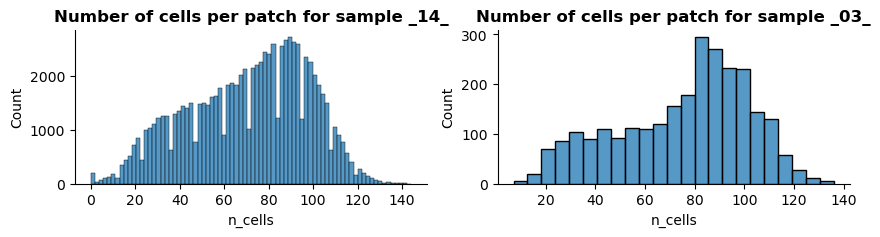

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, df_patches["origin"].nunique()))
for i, orig in enumerate(df_patches["origin"].unique()):
    plt.subplot(1, df_patches["origin"].nunique(), i+1)
    sns.histplot(data=df_patches[df_patches["origin"] == orig], x="n_cells")
    plt.title(f"Number of cells per patch for sample {orig}", weight='bold')
    sns.despine()

Threshold based on the 90.0th quantile: 65.472
Intersection x point: 63.567567567567565


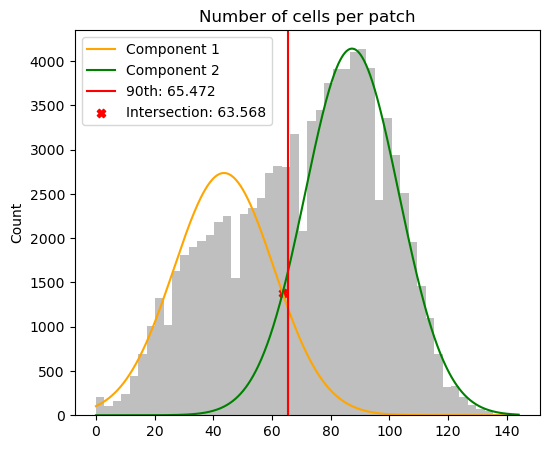

In [17]:
from bulkanalysis.filtering import gmm_threshold

t = gmm_threshold(df_patches["n_cells"].values, 
              return_int=False, 
              quantile_threshold=0.9, 
              title="Number of cells per patch")

In [18]:
df_patches["density_population"] = df_patches["n_cells"].apply(lambda x: "high" if x > t else "low")

In [19]:
## Number of high-cell density patches
print(f"High density patches: {len(df_patches[df_patches['density_population'] == 'high'])}")
print(f"Low density patches: {len(df_patches[df_patches['density_population'] == 'low'])}")

High density patches: 54335
Low density patches: 34982


In [20]:
import numpy as np 

df_prop = df_patches[[col for col in df_patches.columns if col.startswith("prop")]]
df_prop.replace(np.nan, 0, inplace=True)

/tmp/ipykernel_1128506/1740129711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop.replace(np.nan, 0, inplace=True)


In [21]:
# determine prop columns and map to single-letter labels
prop_cols = [c for c in df_prop.columns if c.startswith("prop_")]
label_map = {"prop_T": "T", "prop_I": "I", "prop_C": "C", "prop_D": "D", "prop_E": "E"}

# compute label as the prop column with highest value; if all zeros, set label to None
max_vals = df_prop[prop_cols].max(axis=1)
df_prop["label_single_letter"] = df_prop[prop_cols].idxmax(axis=1).map(label_map)
df_prop.loc[max_vals == 0, "label_single_letter"] = "undetermined"



/tmp/ipykernel_1128506/3233416656.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop["label_single_letter"] = df_prop[prop_cols].idxmax(axis=1).map(label_map)


In [22]:
CATEGORY_TO_NUCLEI = {
    "T": "invasive cancer",
    "I": "immune infiltrate",
    "E": "epithelial",
    "C": "connective tissue",
    "D": "necrosis",
    "undetermined": "undetermined"
}

In [23]:
df_prop["label"] = df_prop["label_single_letter"].apply(lambda x: CATEGORY_TO_NUCLEI[x])

/tmp/ipykernel_1128506/1944791164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prop["label"] = df_prop["label_single_letter"].apply(lambda x: CATEGORY_TO_NUCLEI[x])


In [24]:
df_patches["label"] = [df_prop.loc[idx, "label"] if idx in df_prop.index else "undetermined" for idx in df_patches.index]

In [25]:
PALETTE = {
    "invasive cancer": "red",
    "cancer in situ": "orange",
    "immune infiltrate": "yellow",
    "epithelial": "green",
    "connective tissue": "blue",
    "adipose tissue": "cyan",
    "undetermined": "lightgrey",
}

/tmp/ipykernel_1128506/2065234137.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_patches.value_counts("label"),


([0, 1, 2, 3, 4],
 [Text(0, 0, 'connective tissue'),
  Text(1, 0, 'invasive cancer'),
  Text(2, 0, 'epithelial'),
  Text(3, 0, 'immune infiltrate'),
  Text(4, 0, 'undetermined')])

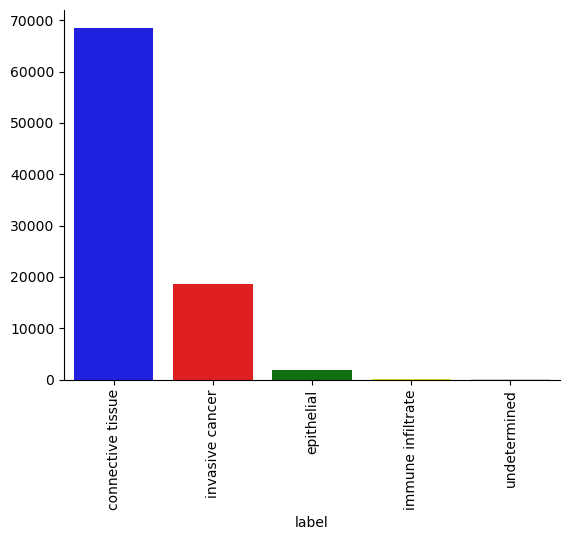

In [26]:
sns.barplot(df_patches.value_counts("label"), 
            palette=PALETTE)
sns.despine()
plt.xticks(rotation=90)

In [27]:
# df_patches[["label"]].to_csv("../../results/Ovarian/compute_patches/all/spots_labels.csv")

In [31]:
import pickle
import gzip
import openslide
import numpy as np


with gzip.open("../../results/Ovarian/compute_patches/all/patches_info.pkl.gz", "rb") as f:
    patches_info = pickle.load(f)
    
    
    

In [32]:
df_patches_info = pd.DataFrame(patches_info)
df_patches_info.set_index("name", inplace=True)
df_patches_info = df_patches_info.merge(df_patches[["label", "density_population"]], left_index=True, right_index=True)

In [30]:
## Let's look at what they look like

## slide 03



## Check if coordinates are correct for a spot
spot_info = [patch for patch in patches_info if patch["name"] == "D1_NAB_HUG_03_spot22x61"][0]


# Open the whole slide image
slide = openslide.OpenSlide(spot_info["path_origin"])
# Get a thumbnail for quick visualization
thumbnail = slide.get_thumbnail(slide.dimensions).convert("RGB")

img = np.array(thumbnail)



In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

Text(0.5, 1.0, 'CellViT annotation, annotating as the majority proportion of cells')

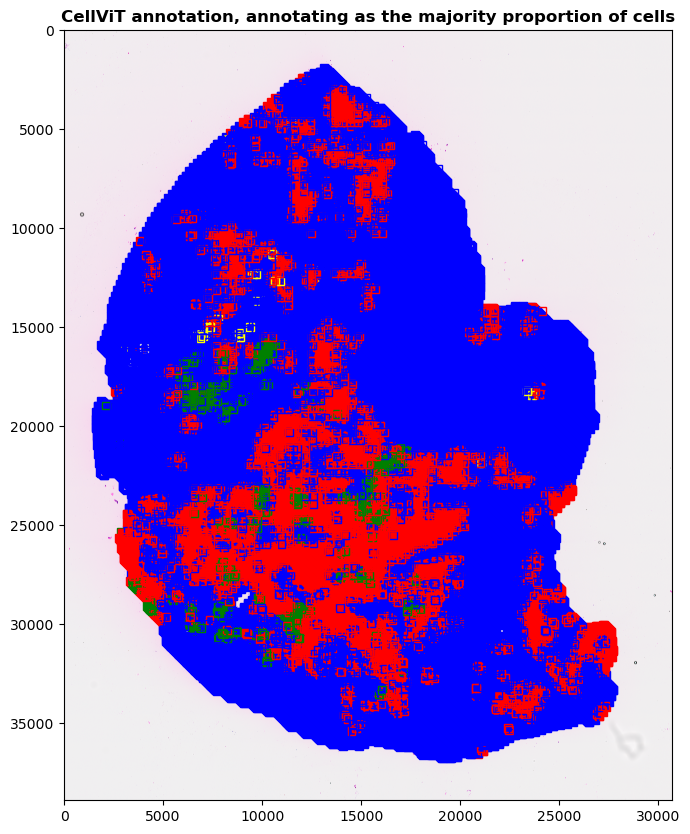

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

for idx, patch in df_patches_info.iterrows():
    if patch["name_origin"] == "NAB-HUG-03_HE_Visium3_Scan1":
        color = PALETTE[patch["label"]]
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)

plt.title(f"CellViT annotation, annotating as the majority proportion of cells", weight="bold")

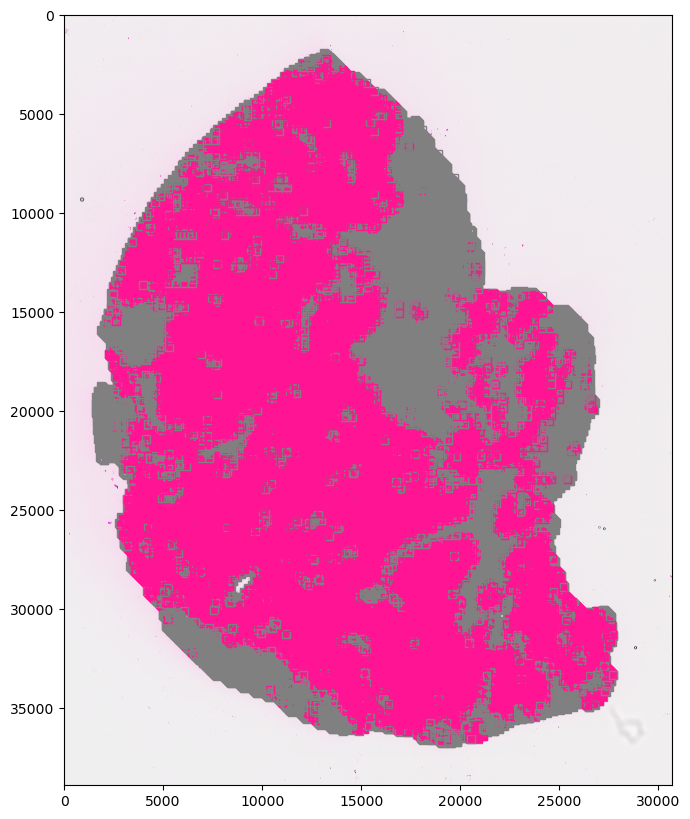

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

for idx, patch in df_patches_info.iterrows():
    if patch["name_origin"] == "NAB-HUG-03_HE_Visium3_Scan1":
        color = "deeppink" if patch["density_population"] == "high" else "gray"
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)

In [82]:
# determine prop columns and map to single-letter labels
prop_cols = ["prop_T", "prop_I", "prop_C", "prop_D", "prop_E"]
label_map = {"prop_T": "T", "prop_I": "I", "prop_C": "C", "prop_D": "D", "prop_E": "E"}

# assign label if it represents >75% of cells AND n_cells > 5, else "undetermined"
def assign_label(row):
    if row["n_cells"] <= 5:
        return "undetermined"
    
    # Get the proportion values
    prop_values = {col: row[col] for col in prop_cols}
    
    max_prop_col = max(prop_values, key=prop_values.get)
    max_prop_val = prop_values[max_prop_col]
    
    if max_prop_val > 0.75:
        return label_map[max_prop_col]
    else:
        return "undetermined"

df_patches["label_single_letter_75"] = df_patches.apply(assign_label, axis=1)
df_patches["label_75"] = df_patches["label_single_letter_75"].apply(lambda x: CATEGORY_TO_NUCLEI[x])

/tmp/ipykernel_1025761/1756415787.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_patches.value_counts("label_75"),


([0, 1, 2, 3],
 [Text(0, 0, 'undetermined'),
  Text(1, 0, 'connective tissue'),
  Text(2, 0, 'invasive cancer'),
  Text(3, 0, 'epithelial')])

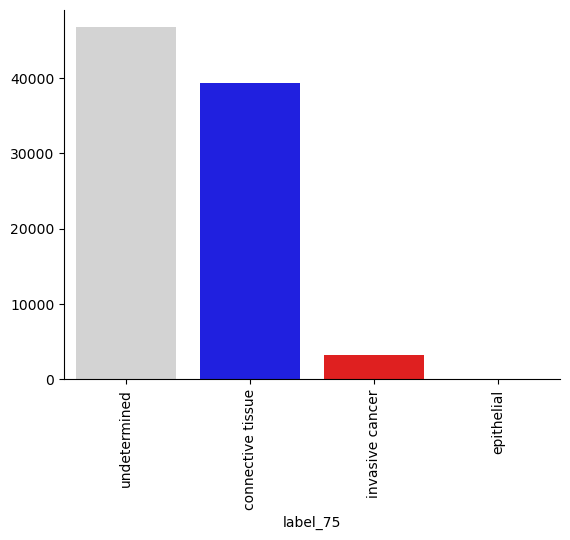

In [83]:
sns.barplot(df_patches.value_counts("label_75"), 
            palette=PALETTE)
sns.despine()
plt.xticks(rotation=90)

In [84]:
df_patches_info = df_patches_info.merge(df_patches[["label_75"]], left_index=True, right_index=True)

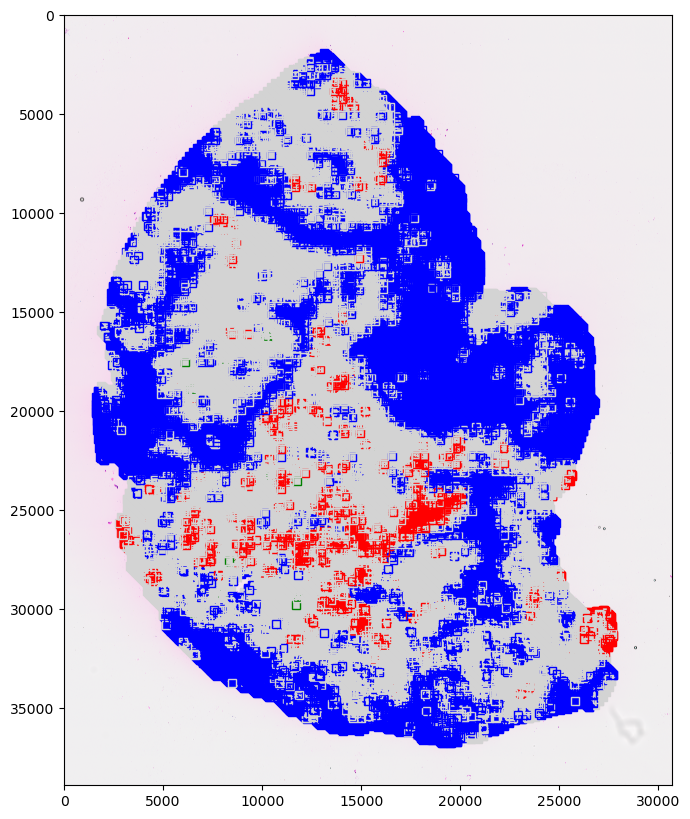

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

for idx, patch in df_patches_info.iterrows():
    if patch["name_origin"] == "NAB-HUG-03_HE_Visium3_Scan1":
        color = PALETTE[patch["label_75"]]
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)

In [85]:
df_patches.replace(np.nan, 0, inplace=True)

Threshold based on the 95.0th quantile: 0.854
Intersection x point: 0.7497497497497497


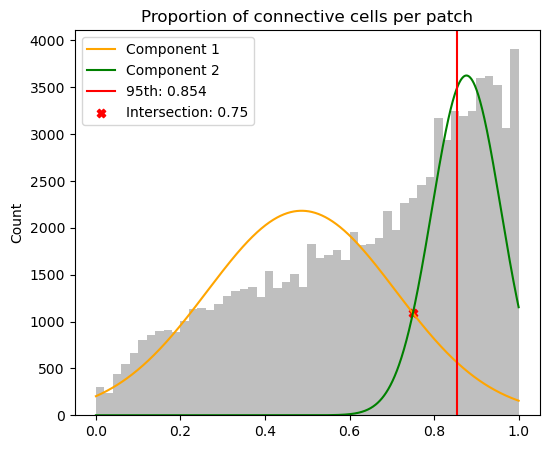

In [110]:
df_patches.replace(np.nan, 0, inplace=True)
t_connective = gmm_threshold(df_patches["prop_C"].values,
                             background_quantile=True, 
                             quantile_threshold=0.95, 
                             title="Proportion of connective cells per patch", 
                             return_int=False)


In [88]:
df_patches["is_connective"] = df_patches["prop_C"].apply(lambda x: x > t_connective)

In [89]:
df_remaining = df_patches[~df_patches['is_connective']]

Threshold based on the 5.0th quantile: 0.11
Intersection x point: 0.21676606183648436


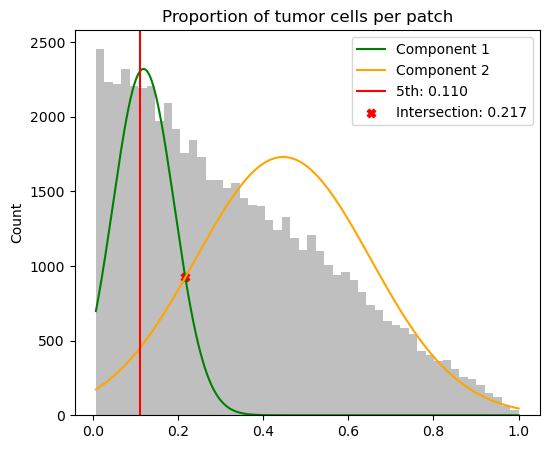

In [91]:
t_tumor = gmm_threshold(df_remaining[df_remaining["prop_T"] > 0]["prop_T"].values,
                                return_int=False,
                             background_quantile=False, 
                             quantile_threshold=0.05, 
                                title="Proportion of tumor cells per patch", 
                                )

In [92]:
df_patches["is_invasive"] = df_patches["prop_T"].apply(lambda x: x > t_tumor)

In [93]:
df_remaining = df_patches[~df_patches["is_invasive"] & ~df_patches["is_connective"]]

Threshold based on the 90.0th quantile: 0.25
Intersection x point: 0.23089756423089755


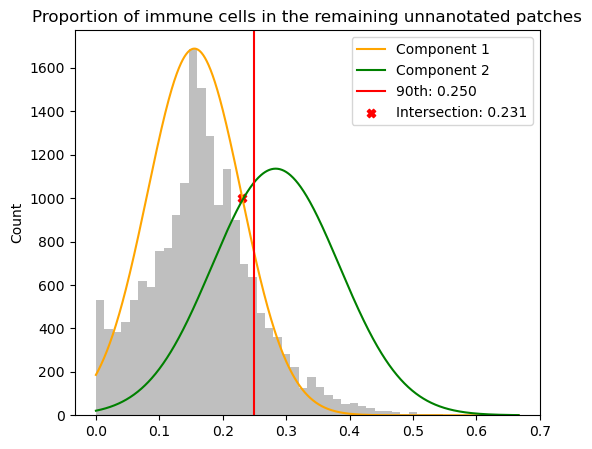

In [94]:
t = gmm_threshold(df_remaining["prop_I"].values, 
              return_int=False,
              background_quantile=True, 
              quantile_threshold=0.9, 
              title="Proportion of immune cells in the remaining unnanotated patches", 
              )

In [95]:
df_patches["is_immune"] = (df_patches["prop_I"] > t) & (~df_patches["is_connective"]) & (~df_patches["is_invasive"])

In [96]:
def define_label(row):
    if row["is_connective"]:
        if row["is_invasive"]:
            return "undetermined"
        else:
            return "connective tissue"
    elif row["is_invasive"]:
        return "invasive cancer"
    elif row["is_immune"]:
        return "immune infiltrate"
    else:
        if (row["prop_E"] > row["prop_I"]) & (row["prop_E"] > row["prop_T"]) & (row["prop_E"] > row["prop_C"]):
            return "epithelial"
        else:
            return "undetermined"
            

In [97]:
df_patches["label_bim"] = df_patches.apply(define_label, axis=1)

In [98]:
df_patches_info = df_patches_info.merge(df_patches[["label_bim"]], left_index=True, right_index=True)

In [99]:
df_patches_info

path  \
NAB-HUG-03_HE_Visium3_Scan1_patch000000  /storage/research/dbmr_luisierlab/temp/lfourni...   
NAB-HUG-03_HE_Visium3_Scan1_patch000001  /storage/research/dbmr_luisierlab/temp/lfourni...   
NAB-HUG-03_HE_Visium3_Scan1_patch000002  /storage/research/dbmr_luisierlab/temp/lfourni...   
NAB-HUG-03_HE_Visium3_Scan1_patch000003  /storage/research/dbmr_luisierlab/temp/lfourni...   
NAB-HUG-03_HE_Visium3_Scan1_patch000004  /storage/research/dbmr_luisierlab/temp/lfourni...   
...                                                                                    ...   
A1_NAB_HUG_14_spot51x25                  /storage/research/dbmr_luisierlab/temp/lfourni...   
A1_NAB_HUG_14_spot51x26                  /storage/research/dbmr_luisierlab/temp/lfourni...   
A1_NAB_HUG_14_spot51x27                  /storage/research/dbmr_luisierlab/temp/lfourni...   
A1_NAB_HUG_14_spot51x28                  /storage/research/dbmr_luisierlab/temp/lfourni...   
A1_NAB_HUG_14_spot51x29                  /storage/research/dbmr_luisierlab/temp/lfourni...   

                                         mpp_height  mpp_width shape_micron  \
NAB-HUG-03_HE_Visium3_Scan1_patch000000    0.249213   0.249213         None   
NAB-HUG-03_HE_Visium3_Scan1_patch000001    0.249213   0.249213         None   
NAB-HUG-03_HE_Visium3_Scan1_patch000002    0.249213   0.249213         None   
NAB-HUG-03_HE_Visium3_Scan1_patch000003    0.249213   0.249213         None   
NAB-HUG-03_HE_Visium3_Scan1_patch000004    0.249213   0.249213         None   
...                                             ...        ...          ...   
A1_NAB_HUG_14_spot51x25                         NaN        NaN         None   
A1_NAB_HUG_14_spot51x26                         NaN        NaN         None   
A1_NAB_HUG_14_spot51x27                         NaN        NaN         None   
A1_NAB_HUG_14_spot51x28                         NaN        NaN         None   
A1_NAB_HUG_14_spot51x29                         NaN        NaN         None   

                                         shape_pixel  overlap_pixel  \
NAB-HUG-03_HE_Visium3_Scan1_patch000000          401            0.0   
NAB-HUG-03_HE_Visium3_Scan1_patch000001          401            0.0   
NAB-HUG-03_HE_Visium3_Scan1_patch000002          401            0.0   
NAB-HUG-03_HE_Visium3_Scan1_patch000003          401            0.0   
NAB-HUG-03_HE_Visium3_Scan1_patch000004          401            0.0   
...                                              ...            ...   
A1_NAB_HUG_14_spot51x25                          400            NaN   
A1_NAB_HUG_14_spot51x26                          400            NaN   
A1_NAB_HUG_14_spot51x27                          400            NaN   
A1_NAB_HUG_14_spot51x28                          400            NaN   
A1_NAB_HUG_14_spot51x29                          400            NaN   

                                                                               path_origin  \
NAB-HUG-03_HE_Visium3_Scan1_patch000000  /storage/research/dbmr_luisierlab/database/Ova...   
NAB-HUG-03_HE_Visium3_Scan1_patch000001  /storage/research/dbmr_luisierlab/database/Ova...   
NAB-HUG-03_HE_Visium3_Scan1_patch000002  /storage/research/dbmr_luisierlab/database/Ova...   
NAB-HUG-03_HE_Visium3_Scan1_patch000003  /storage/research/dbmr_luisierlab/database/Ova...   
NAB-HUG-03_HE_Visium3_Scan1_patch000004  /storage/research/dbmr_luisierlab/database/Ova...   
...                                                                                    ...   
A1_NAB_HUG_14_spot51x25                  /storage/research/dbmr_luisierlab/database/Ova...   
A1_NAB_HUG_14_spot51x26                  /storage/research/dbmr_luisierlab/database/Ova...   
A1_NAB_HUG_14_spot51x27                  /storage/research/dbmr_luisierlab/database/Ova...   
A1_NAB_HUG_14_spot51x28                  /storage/research/dbmr_luisierlab/database/Ova...   
A1_NAB_HUG_14_spot51x29                  /storage/research/dbmr_luisierlab/database/Ova...   

                          

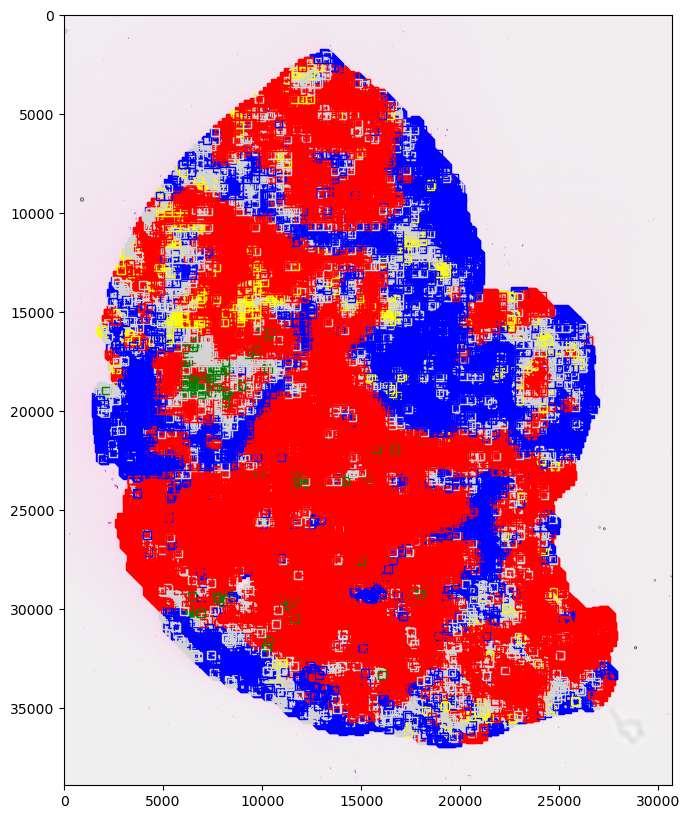

In [103]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

for idx, patch in df_patches_info.iterrows():
    if patch["name_origin"] == "NAB-HUG-03_HE_Visium3_Scan1":
        color = PALETTE[patch["label_bim"]]
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)

/tmp/ipykernel_1025761/1397955605.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_patches.value_counts("label_bim"),


([0, 1, 2, 3, 4],
 [Text(0, 0, 'invasive cancer'),
  Text(1, 0, 'connective tissue'),
  Text(2, 0, 'undetermined'),
  Text(3, 0, 'immune infiltrate'),
  Text(4, 0, 'epithelial')])

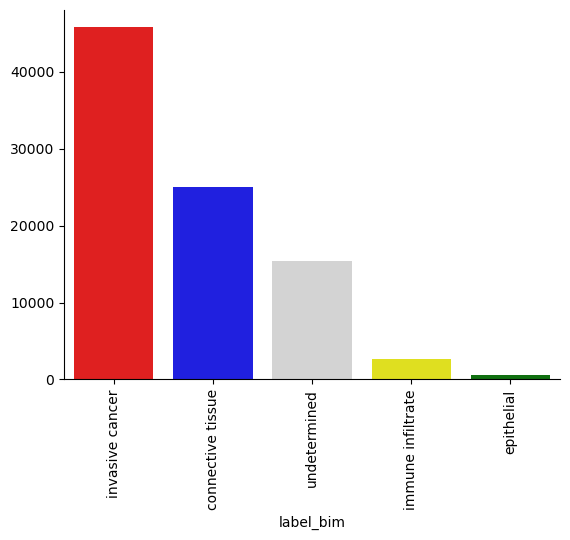

In [105]:
sns.barplot(df_patches.value_counts("label_bim"), 
            palette=PALETTE)
sns.despine()
plt.xticks(rotation=90)

In [53]:
df_patches[["label_bim"]].rename(columns={"label_bim": "label"}).to_csv("../../results/Ovarian/compute_patches/all/spots_labels.csv")

In [104]:
## Check if coordinates are correct for a spot
spot_info = [patch for patch in patches_info if patch["name"] == "NAB-HUG-14_HE_Visium3_Scan1_patch13720"][0]


# Open the whole slide image
slide = openslide.OpenSlide(spot_info["path_origin"])
# Get a thumbnail for quick visualization
thumbnail = slide.get_thumbnail(slide.dimensions).convert("RGB")

img = np.array(thumbnail)


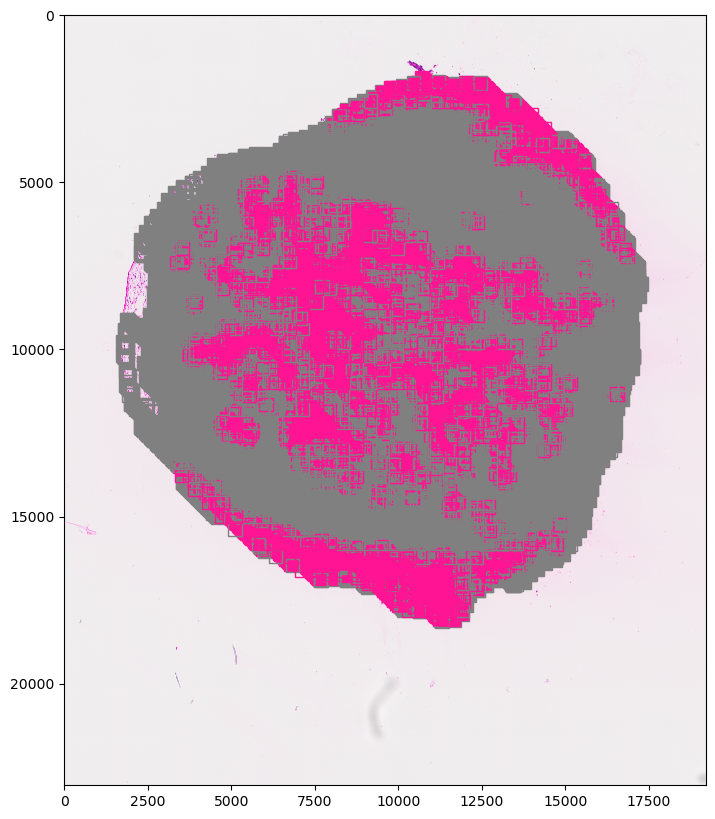

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

for idx, patch in df_patches_info.iterrows():
    if patch["name_origin"] == "NAB-HUG-14_HE_Visium3_Scan1":
        color = "deeppink" if patch["density_population"] == "high" else "gray"
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)

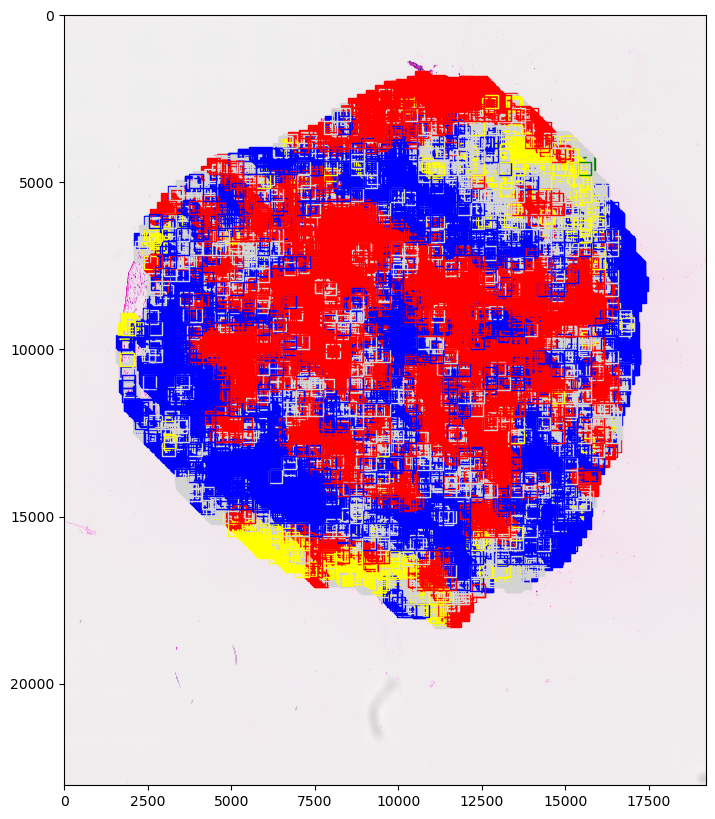

In [106]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

for idx, patch in df_patches_info.iterrows():
    if patch["name_origin"] == "NAB-HUG-14_HE_Visium3_Scan1":
        color = PALETTE[patch["label_bim"]]
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)

## FInal version

Threshold based on the 5.0th quantile: 0.056
Intersection x point: 0.15514105654950724


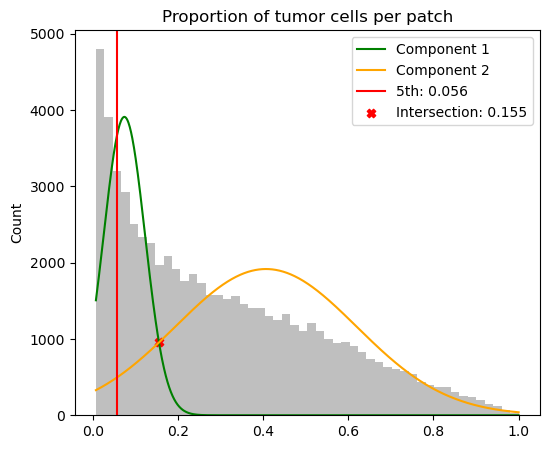

In [33]:
df_patches.replace(np.nan, 0, inplace=True)
t_tumor_v2 = gmm_threshold(df_patches[df_patches["prop_T"] > 0]["prop_T"].values,
                             background_quantile=False, 
                             quantile_threshold=0.05, 
                             title="Proportion of tumor cells per patch", 
                             return_int=False)

In [34]:
df_patches["is_invasive_v2"] = df_patches["prop_T"].apply(lambda x: x > t_tumor_v2)

In [35]:
df_remaining = df_patches[~df_patches['is_invasive_v2']]

Threshold based on the 5.0th quantile: 0.77
Intersection x point: 0.8068068068068068


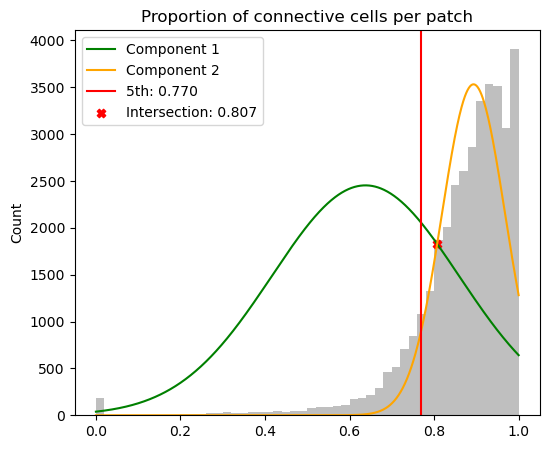

In [36]:
t_connective_v2 = gmm_threshold(df_remaining["prop_C"].values,
                             background_quantile=False, 
                             quantile_threshold=0.05, 
                             title="Proportion of connective cells per patch", 
                             return_int=False)

In [37]:
df_patches["is_connective_v2"] = df_patches["prop_C"].apply(lambda x: x > t_connective_v2)

In [38]:
df_remaining = df_patches[~df_patches['is_invasive_v2'] & ~df_patches['is_connective_v2']]

In [39]:
def get_label_v2(row):
    if row["is_invasive_v2"]:
        return "invasive cancer"
    elif row["is_connective_v2"]:
        return "connective tissue"
    else:
        if row["prop_I"] > 0:
            return "immune infiltrate"
        else:
            return "undetermined"

In [40]:
df_patches["label_bim_v2"] = df_patches.apply(get_label_v2, axis=1)

/tmp/ipykernel_1128506/1585353023.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_patches.value_counts("label_bim_v2"),


([0, 1, 2, 3],
 [Text(0, 0, 'invasive cancer'),
  Text(1, 0, 'connective tissue'),
  Text(2, 0, 'immune infiltrate'),
  Text(3, 0, 'undetermined')])

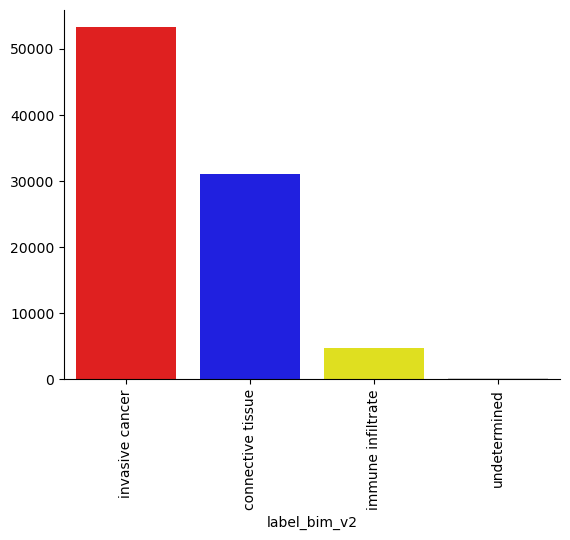

In [41]:
sns.barplot(df_patches.value_counts("label_bim_v2"), 
            palette=PALETTE)
sns.despine()
plt.xticks(rotation=90)

In [42]:
df_patches_info = df_patches_info.merge(df_patches[["label_bim_v2"]], left_index=True, right_index=True)

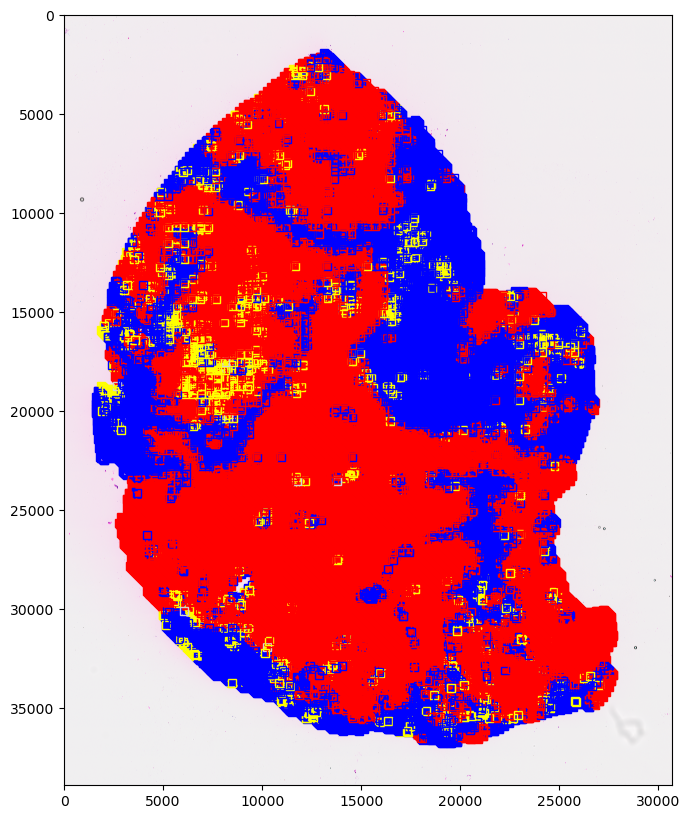

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

for idx, patch in df_patches_info.iterrows():
    if patch["name_origin"] == "NAB-HUG-03_HE_Visium3_Scan1":
        color = PALETTE[patch["label_bim_v2"]]
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)

In [48]:
## Check if coordinates are correct for a spot
spot_info_14 = [patch for patch in patches_info if patch["name"] == "NAB-HUG-14_HE_Visium3_Scan1_patch13720"][0]


# Open the whole slide image
slide_14 = openslide.OpenSlide(spot_info_14["path_origin"])
# Get a thumbnail for quick visualization
thumbnail_14 = slide_14.get_thumbnail(slide_14.dimensions).convert("RGB")



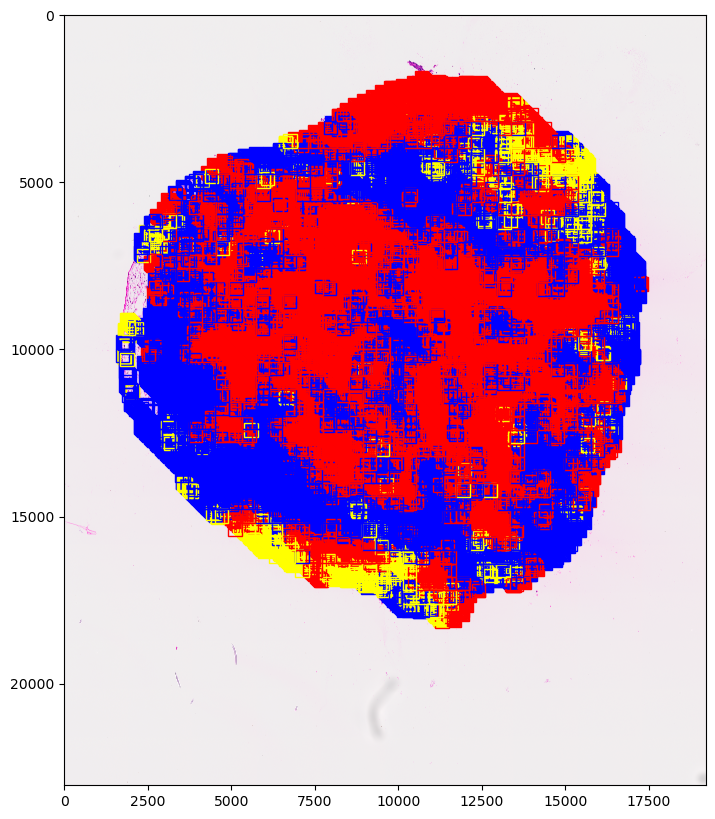

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail_14)

for idx, patch in df_patches_info.iterrows():
    if patch["name_origin"] == "NAB-HUG-14_HE_Visium3_Scan1":
        color = PALETTE[patch["label_bim_v2"]]
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)

In [50]:
df_patches[["label_bim_v2"]].rename(columns={"label_bim_v2": "label"}).to_csv("../../results/Ovarian/compute_patches/all/spots_labels.csv")